In [5]:
# Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.widgets import Slider
import numpy as np
import cv2 as cv
from scipy.optimize import curve_fit
from scipy.ndimage import median_filter
import h5py
import os

In [6]:
cachimbo = np.load(fr"D:\microxplorer\TC2_Cachimbo_Arquiometria_20251013\sino_correted_align.npz")
cachimbo = cachimbo['sino']
print(cachimbo.shape, cachimbo.dtype, cachimbo.min(), cachimbo.max())
imgSrc = cachimbo

(400, 1200, 1000) float32 0.0005558643 1.2387359


In [7]:
print(imgSrc.shape)

(400, 1200, 1000)


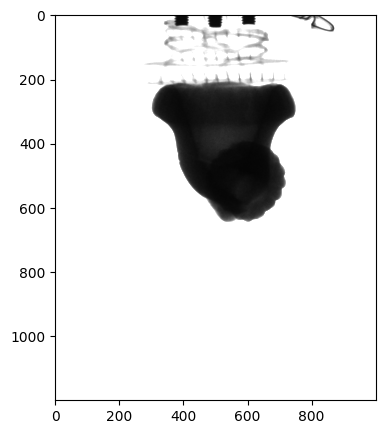

In [11]:
plt.rcParams["figure.figsize"]=5,5
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[10, :,:], 'gray', vmin=imgSrc.min(), vmax=imgSrc.max()*0.4)

In [14]:
print(imgSrc.shape)
print(imgSrc.shape[0], imgSrc.shape[1], imgSrc.shape[2])
minVal = imgSrc.min()
maxVal = imgSrc.max()
print(minVal, maxVal, imgSrc.mean())

(400, 1200, 1000)
400 1200 1000
0.0005558643 1.0 0.839064


In [21]:
imgSrc[imgSrc > 1] = 1

In [15]:
imgSrc = (((imgSrc-minVal)/(maxVal-minVal))*65535).astype("uint16")

print(imgSrc.min(), imgSrc.max(), imgSrc.mean())

0 65535 54974.064862789586


In [16]:
for i in range(imgSrc.shape[0]):
    imgSrc[i, :, :] = imgSrc[i, ::-1, :]

    

In [17]:
imgSrc = imgSrc/65535

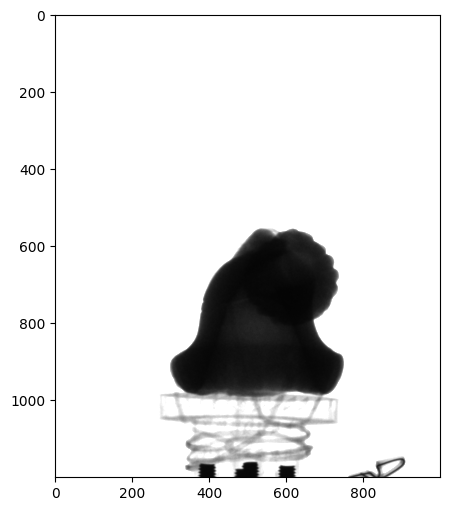

In [19]:
plt.rcParams["figure.figsize"]=8,6
fig = plt.figure()
ax = plt.axes()
ax.imshow(imgSrc[15, :,:], 'gray', vmin=imgSrc.min(), vmax=imgSrc.max()*0.6)

In [22]:
#Coloca a metade das projeções como frames

width = 1000 
height = 1200
framesNumber = (imgSrc.shape[0]//1)
time = 40
fps = framesNumber/time

fourcc = cv.VideoWriter_fourcc(*'mp4v')
video = cv.VideoWriter('test.mp4', fourcc, float(fps), (width, height))

#print(framesNumber)

for i in range(0, imgSrc.shape[0], 4):
    img = imgSrc[i, :, :]*1.5
    img[img > 1] = 1
    img = (img)*255
    img = img.astype(np.uint8)
    print(i, img.shape, img.max(), img.min(), img.mean(), np.isnan(img).sum())
    video.write(cv.cvtColor(img, cv.COLOR_GRAY2BGR))
    #video.write(img)

video.release() 

0 (1200, 1000) 255 2 225.06651 0
4 (1200, 1000) 255 2 224.65323666666666 0
8 (1200, 1000) 255 2 224.15778166666666 0
12 (1200, 1000) 255 1 223.51771166666666 0
16 (1200, 1000) 255 1 222.94021333333333 0
20 (1200, 1000) 255 2 222.300635 0
24 (1200, 1000) 255 1 221.721915 0
28 (1200, 1000) 255 2 221.15374833333334 0
32 (1200, 1000) 255 2 220.66137083333334 0
36 (1200, 1000) 255 1 220.270095 0
40 (1200, 1000) 255 1 219.917325 0
44 (1200, 1000) 255 1 219.59612 0
48 (1200, 1000) 255 1 219.3535725 0
52 (1200, 1000) 255 1 219.11238916666667 0
56 (1200, 1000) 255 2 218.87308583333333 0
60 (1200, 1000) 255 2 218.6092975 0
64 (1200, 1000) 255 4 218.2834175 0
68 (1200, 1000) 255 2 217.96529 0
72 (1200, 1000) 255 3 217.662005 0
76 (1200, 1000) 255 4 217.41109 0
80 (1200, 1000) 255 3 217.25980416666667 0
84 (1200, 1000) 255 1 217.16287 0
88 (1200, 1000) 255 4 217.1191325 0
92 (1200, 1000) 255 3 217.14053833333332 0
96 (1200, 1000) 255 4 217.1697725 0
100 (1200, 1000) 255 3 217.26409333333334 0
104 